In [5]:
import jax
import jax.numpy as jnp
from tqdm import tqdm
import netket as nk
import netket.jax as nkjax
# import netket_pro as nkp
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
from tqdm import tqdm
import jax.numpy as jnp
import jax
from grad_sample.utils.misc import compute_eloc
from grad_sample.utils.distances import curved_dist, fs_dist, param_overlap
from hydra import compose, initialize, initialize_config_dir
from omegaconf import OmegaConf
from hydra.core.global_hydra import GlobalHydra
from hydra.utils import instantiate
from grad_sample.tasks.fullsum_analysis import FullSumPruning
from grad_sample.tasks.fullsum_train import Trainer
from grad_sample.utils.is_distrib import *
from grad_sample.utils.plotting_setup import *
from grad_sample.is_hpsi.expect import *
from grad_sample.is_hpsi.qgt import QGTJacobianDenseImportanceSampling
from grad_sample.is_hpsi.operator import IS_Operator

In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
mc_sample = 10 #2**mc_sample samples
is_keys = ["hpsi", "0.0",  "0.5", "1.0", "1.3", "2.0"]
diag_shift = "10_4"
out_dict = {}

for key in is_keys:
    out_dict[key] = {}
    out_dict[key]["rel_err"] = json.load(open(f"/scratch/.amisery/grad_sample/xxz_1.5/L16/RBM/alpha3/MC_{mc_sample}_{key}/saved_{diag_shift}.log"))["rel_err"]
    out_dict[key]["out_path"] = f"/scratch/.amisery/grad_sample/xxz_1.5/L16/RBM/alpha3/MC_{mc_sample}_{key}/saved_{diag_shift}/"

In [16]:
autodiagshift_log = json.load(open("/home/amisery/phd/saved_10_4_diagshift_schedule.log"))

In [24]:
diag_shift = autodiagshift_log["adaptive_diagshift"]["diag_shift"]
lr = autodiagshift_log["adaptive_diagshift"]["lr"]

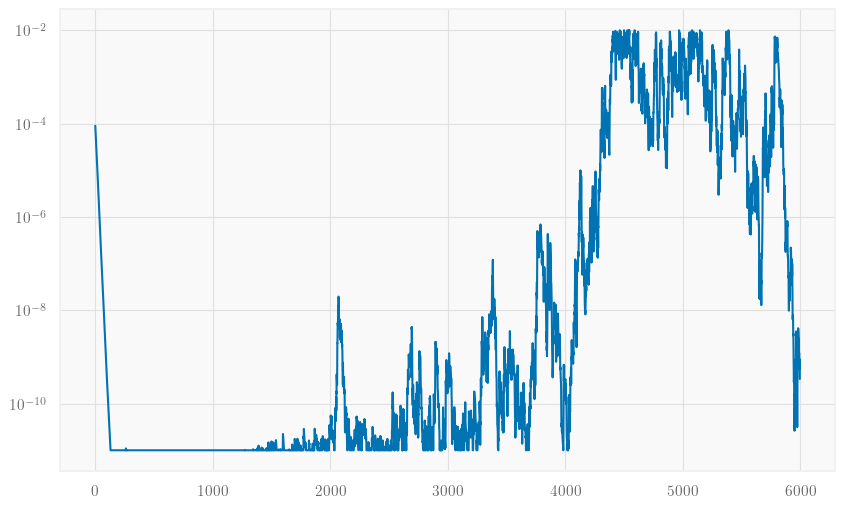

In [ ]:
plt.plot(diag_shift["iters"], diag_shift["value"])
plt.yscale("log")

TypeError: unhashable type: 'dict'

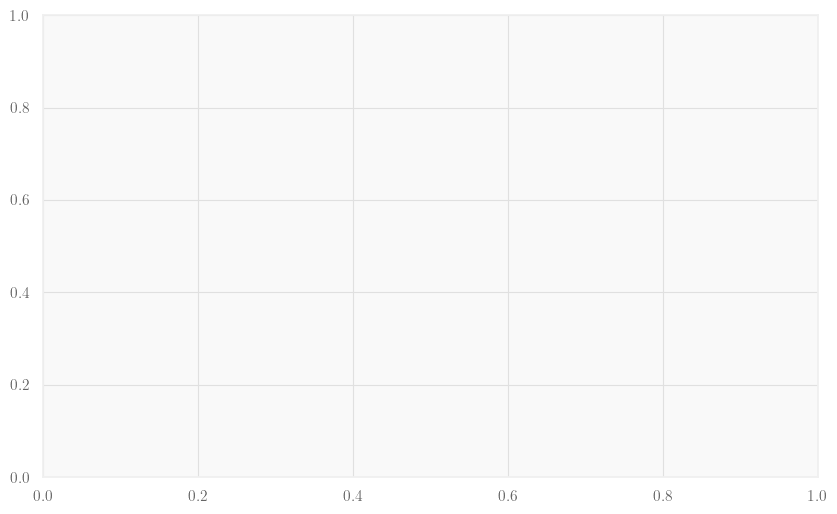

In [27]:
plt.plot(lr["iters"], lr["value"])
plt.yscale("log")

In [15]:
if GlobalHydra().is_initialized():
    GlobalHydra().clear()
with initialize_config_dir(version_base=None, config_dir="/scratch/.amisery/grad_sample/xxz_1.5/L16/RBM/alpha3/MC_10_hpsi/saved_10_3/"):
    cfg = compose(config_name="config")
    print(type(cfg))
    OmegaConf.set_struct(cfg, True)
    print(cfg)
    print(type(cfg.task))
    # cfg = OmegaConf.to_yaml(cfg)
    # take any task from cfg and run it
analysis = Trainer(cfg)

<class 'omegaconf.dictconfig.DictConfig'>
{'device': 6, 'is_mode': 'hpsi', 'solver_fn': {'_target_': 'netket.optimizer.solver.cholesky'}, 'lr': 0.001, 'diag_shift': 0.001, 'n_iter': 8000, 'sample_size': 10, 'chunk_size_jac': 1024, 'chunk_size_vmap': 100, 'save_every': 10, 'base_path': '/scratch/.amisery/grad_sample/', 'model': {'_target_': 'grad_sample.models.heisenberg.XXZ', 'h': 1.5, 'L': 16}, 'ansatz': {'_target_': 'netket.models.RBM', 'alpha': 3, 'param_dtype': 'complex'}, 'task': {'_target_': 'grad_sample.tasks.fullsum_train.Trainer'}}
<class 'omegaconf.dictconfig.DictConfig'>
[CudaDevice(id=0)]
{'_target_': 'netket.models.RBM', 'alpha': 3, 'param_dtype': 'complex'}
MC state loaded, num samples 1024
/scratch/.amisery/grad_sample//xxz_1.5/L16/RBM/alpha3/MC_10_hpsi/saved_10_3
dir created


/scratch/.amisery/netket/lib/python3.11/site-packages/netket/utils/struct/pytree.py:55: UserWarning: Constructing the SR object with `SR(qgt= MyQGTType({'diag_shift', 'diag_scale'}))` can lead to unexpected results and has been deprecated, because the keyword arguments specified in the QGTType are overwritten by those specified by the SR class and its defaults.

To fix this, construct SR as  `SR(qgt=MyQGTType, {'diag_shift': 0.0, 'diag_scale': None})` .

In the future, this warning will become an error.
  obj.__init__(*args, **kwargs)


The ground state energy is: -33.71105604086474
